<a href="https://colab.research.google.com/github/LorenzoZaccagnini/cryptography-works/blob/master/Create_MD5_collision_ANSA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Collisioni MD5

Notebook creato da [Lorenzo Zaccagnini](https://www.linkedin.com/in/lorenzo-zaccagnini/)

Questa è l'immagine del progetto dell'ANSA che usa MD5
![alt text](https://www.cryptoavvocato.it/wp-content/uploads/2020/04/ANSA-Ceck.jpg)

Il problema è l'uso del MD5 come identificativo univoco, in questo notebook verrà dimostrato sia possibile creare lo stesso MD5 con due binari differenti.

[Lo script è preso da questa repository](https://github.com/sadhikar/MD5Collision)

[Il paper](https://www.mscs.dal.ca/~selinger/md5collision/) 

[Altro esempio dove si hanno due immagini uguali con lo stesso MD5](https://natmchugh.blogspot.com/2014/10/how-i-created-two-images-with-same-md5.html)

1. Scarichiamo la repository dentro colab, ci permetterà di creare due programmi con istruzioni differenti ma con lo stesso MD5


In [0]:
!wget https://github.com/sadhikar/MD5Collision/archive/master.zip

--2020-04-14 16:49:41--  https://github.com/sadhikar/MD5Collision/archive/master.zip
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://codeload.github.com/sadhikar/MD5Collision/zip/master [following]
--2020-04-14 16:49:42--  https://codeload.github.com/sadhikar/MD5Collision/zip/master
Resolving codeload.github.com (codeload.github.com)... 140.82.112.9
Connecting to codeload.github.com (codeload.github.com)|140.82.112.9|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘master.zip’

master.zip              [  <=>               ] 159.01K   287KB/s    in 0.6s    

2020-04-14 16:49:43 (287 KB/s) - ‘master.zip’ saved [162829]



In [0]:
!unzip master.zip

Archive:  master.zip
d3cb502ca8b072d49c7484e2af981596fc4cce2b
   creating: MD5Collision-master/
   creating: MD5Collision-master/MD5collision_Output/
  inflating: MD5Collision-master/MD5collision_Output/evil  
  inflating: MD5Collision-master/MD5collision_Output/good  
  inflating: MD5Collision-master/README.md  
   creating: MD5Collision-master/evilize-0.1/
  inflating: MD5Collision-master/evilize-0.1/COPYING  
  inflating: MD5Collision-master/evilize-0.1/MBSD-LICENSE  
  inflating: MD5Collision-master/evilize-0.1/Makefile  
  inflating: MD5Collision-master/evilize-0.1/README  
  inflating: MD5Collision-master/evilize-0.1/crib.h  
  inflating: MD5Collision-master/evilize-0.1/evil  
  inflating: MD5Collision-master/evilize-0.1/evilize  
  inflating: MD5Collision-master/evilize-0.1/evilize.c  
  inflating: MD5Collision-master/evilize-0.1/evilize.o  
  inflating: MD5Collision-master/evilize-0.1/good  
  inflating: MD5Collision-master/evilize-0.1/goodevil.c  
  inflating: MD5Collision-mas

In [0]:
%cd MD5Collision-master/evilize-0.1/

/content/MD5Collision-master/evilize-0.1


In [0]:
%pwd

'/content/MD5Collision-master/evilize-0.1'

Seguendo [i passaggi descritti nella repo originale](https://github.com/sadhikar/MD5Collision/tree/master/evilize-0.1) è possibile creare due binari con comportamenti differenti ma con lo stesso MD5, in questo caso **good** e **evil**

In [0]:
!md5sum good

59e240a4ea963693b39cdfed2955f858  good


In [0]:
!md5sum evil

59e240a4ea963693b39cdfed2955f858  evil


In [0]:
!chmod 755 good
!chmod 755 evil

In [0]:
!./good

Hello, world!

(press enter to quit)


In [0]:
!./evil

Hello, world!

(press enter to quit)


Creo due funzioni differenti con due messaggi in output differenti

In [0]:
%%writefile verofalso.c


#include <stdio.h>
#include <unistd.h>

/* do something innocent */
int main_good(int ac, char *av[]) {
  fprintf(stdout, "Un messaggio vero!\n");
  sleep(1);
  return 0;
}

/* do something evil */
int main_evil(int ac, char *av[]) {
  fprintf(stdout, "Un messaggio falso!\n");
  sleep(1);
  return 0;
}

Writing verofalso.c


Compilo

In [0]:
!gcc verofalso.c goodevil.o -o verofalso

Creo due binari, corrispondenti alle due funzioni


In [0]:
!./evilize verofalso -g vero -e falso

Initial vector: 0xc3c11b57 0x18037329 0x21f67871 0xf44dc0f0
Searching for MD5 collision (this can take several hours)...
Random seed: 1580722640
Progress: 1.0Progress: 1.1Progress: 1.2Progress: 1.3Progress: 1.4Progress: 1.5Progress: 1.6Progress: 1.7Progress: 1.8Progress: 1.9Progress: 1.10Progress: 1.11Progress: 1.12Progress: 1.13Progress: 1.14Progress: 1.15Progress: 1.16Progress: 1.17Progress: 1.18Progress: 1.19Progress: 1.20Progress: 1.21Progress: 1.22Progress: 1.23Progress: 1.24Progress: 1.25Progress: 1.26Progress: 1.27Progress: 1.28Progress: 1.29Progress: 1.30Progress: 1.31Progress: 1.32Progress: 1.33Progress: 1.34Progress: 1.35Progress: 1.36Progress: 1.37Progress: 1.38Progress: 1.39Progress: 1.40Progress: 1.41Progress: 1.42Progress: 1.43Progress: 1.44Progress: 1.45Progress: 1.46Progress: 1.47Progress: 1.48Progress: 1.49Progress: 1.50Progress: 1.51Progress: 1.52Progress: 1.53Progress: 1.54Progress: 1.55Progress: 1.56Progress: 1.57Progress: 1.58Progress: 1.59Progress: 1.60Progress: 1

**Verifico i due binari**

Verifico il primo

In [0]:
!md5sum vero

d18f76d66e1f1a8cde9797f19d957bc8  vero


Verifico il secondo

In [0]:
!md5sum falso

d18f76d66e1f1a8cde9797f19d957bc8  falso


In [0]:
import hashlib
def md5(fname):
    hash_md5 = hashlib.md5()
    with open(fname, "rb") as f:
        for chunk in iter(lambda: f.read(4096), b""):
            hash_md5.update(chunk)
    return hash_md5.hexdigest()

def sha256(fname):
    hash_sha256 = hashlib.sha256()
    with open(fname, "rb") as f:
        for chunk in iter(lambda: f.read(4096), b""):
            hash_sha256.update(chunk)
    return hash_sha256.hexdigest()

In [0]:
print('file A: ' + md5('vero'))
print('file B: ' + md5('falso'))

if md5('vero') == md5('falso'):
  print('gli hash sono identici, MD5 non è univoco')
else:
  print('gli hash sono diversi')

file A: d18f76d66e1f1a8cde9797f19d957bc8
file B: d18f76d66e1f1a8cde9797f19d957bc8
gli hash sono identici, MD5 non è univoco


**Proviamo con SHA256**

In [0]:
print('file A: ' + sha256('vero'))
print('file B: ' + sha256('falso'))

if sha256('vero') == sha256('falso'):
  print('gli hash sono identici, MD5 non è univoco')
else:
  print('gli hash sono diversi')

file A: 51044084af952b93520f19cea37e6221e0b956d23bf670774513eaa8a9a09093
file B: c435ab844a654a039cb3e1eebd5c38d6e702d63bdda8b1992f221e5a83e02f5e
gli hash sono diversi


# Immagini
Un esempio di due immagini differenti con lo stesso hash MD5![Texte alternatif…](https://github.com/LorenzoZaccagnini/cryptography-works/blob/master/plane.jpg?raw=true)

hash MD5:


In [0]:
!curl -sL https://github.com/LorenzoZaccagnini/cryptography-works/blob/master/plane.jpg?raw=true | md5sum

253dd04e87492e4fc3471de5e776bc3d  -


![alt text](https://github.com/LorenzoZaccagnini/cryptography-works/blob/master/ship.jpg?raw=true)

hash md5:

In [0]:
!curl -sL https://github.com/LorenzoZaccagnini/cryptography-works/blob/master/ship.jpg?raw=true | md5sum

253dd04e87492e4fc3471de5e776bc3d  -


Proviamo con una mia foto ed una di Jon Snow

**Lorenzo**

![alt text](https://www.devoleum.com/53253bb4075de6ff9d2c5e02700896a9.jpg)

**Jon**

![alt text](https://vignette.wikia.nocookie.net/gameofthrones/images/d/d0/JonSnow8x06.PNG/revision/latest/top-crop/width/360/height/360?cb=20190714094440)

Useremo HashTable

In [64]:
!wget https://raw.githubusercontent.com/corkami/collisions/master/scripts/jpg.py
!wget https://raw.githubusercontent.com/corkami/collisions/master/scripts/jpg1.bin
!wget https://raw.githubusercontent.com/corkami/collisions/master/scripts/jpg2.bin




--2020-04-14 21:05:59--  https://raw.githubusercontent.com/corkami/collisions/master/scripts/jpg.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1973 (1.9K) [text/plain]
Saving to: ‘jpg.py’

jpg.py              100%[===================>]   1.93K  --.-KB/s    in 0s      

2020-04-14 21:05:59 (35.4 MB/s) - ‘jpg.py’ saved [1973/1973]

--2020-04-14 21:06:01--  https://raw.githubusercontent.com/corkami/collisions/master/scripts/jpg1.bin
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 128 [application/octet-stream]
Saving to: ‘jpg1.bin’

jpg1.

Scarichiamo le immagini di me e Jon Snow

In [65]:
!wget https://github.com/LorenzoZaccagnini/cryptography-works/raw/master/lorenzo.jpg
!wget https://github.com/LorenzoZaccagnini/cryptography-works/raw/master/jon.jpg

--2020-04-14 21:06:54--  https://github.com/LorenzoZaccagnini/cryptography-works/raw/master/lorenzo.jpg
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/LorenzoZaccagnini/cryptography-works/master/lorenzo.jpg [following]
--2020-04-14 21:06:55--  https://raw.githubusercontent.com/LorenzoZaccagnini/cryptography-works/master/lorenzo.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 52096 (51K) [image/jpeg]
Saving to: ‘lorenzo.jpg’

lorenzo.jpg         100%[===================>]  50.88K  --.-KB/s    in 0.02s   

2020-04-14 21:06:55 (2.04 MB/s) - ‘lorenzo.jpg’ saved [52096/52096]

--2020-04-14 21:06:57--

Proviamo a trovare delle collisioni tra le due immagini

In [0]:
!chmod 775 jpg.py
!python2 jpg.py lorenzo.jpg jon.jpg

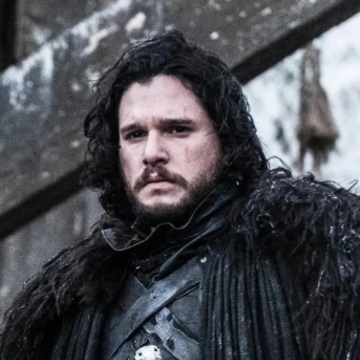

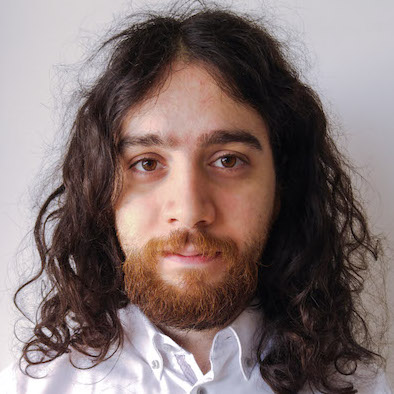

In [67]:
from IPython.display import Image, display
display(Image('collision1.jpg'))
display(Image('collision2.jpg'))

In [0]:
import hashlib
def md5(fname):
    hash_md5 = hashlib.md5()
    with open(fname, "rb") as f:
        for chunk in iter(lambda: f.read(4096), b""):
            hash_md5.update(chunk)
    return hash_md5.hexdigest()

def sha256(fname):
    hash_sha256 = hashlib.sha256()
    with open(fname, "rb") as f:
        for chunk in iter(lambda: f.read(4096), b""):
            hash_sha256.update(chunk)
    return hash_sha256.hexdigest()

In [0]:
file_a = 'collision1.jpg'
file_b = 'collision2.jpg'

In [72]:
print('file A: ' + md5(file_a))
print('file B: ' + md5(file_b))

if md5(file_a) == md5(file_b):
  print('gli hash sono identici, secondo MD5 Lorenzo Zaccagnini è Jon Snow')
else:
  print('gli hash sono diversi')

file A: 679abfdad9064669f63a1247f92c0339
file B: 679abfdad9064669f63a1247f92c0339
gli hash sono identici, Lorenzo Zaccagnini è Jon Snow


**Proviamo con SHA256**

In [73]:
print('file A: ' + sha256(file_a))
print('file B: ' + sha256(file_b))

if sha256(file_a) == sha256(file_b):
  print('gli hash sono identici, secondo SHA256 Lorenzo Zaccagnini è Jon Snow')
else:
  print('gli hash sono diversi')

file A: 2df1a7399def2c3d79f20bf6670ca714e4ee949aaff9f7029ab00c9ba7d08b0c
file B: d8edc4dd68bb3ad1019cb7dc34d6a27b1f524d303e9649b6f7ecdacc33e5c864
gli hash sono diversi
